In [3]:
#Install yfinance package and import essential libraries
!pip install yfinance
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical computations
import matplotlib.pyplot as plt      # For data visualization
import datetime as dt                # For working with date and time
import yfinance as yf                # Yahoo Finance API for fetching stock data
import os                            # For interacting with the operating system

In [5]:
# Set the plotting style to 'ggplot'
plt.style.use('ggplot')

In [11]:
#Download and import data
data_folder = 'C:/Users/GHALEB/Desktop/TwitterSentimentStrategy'
sentiment_df = pd.read_csv(os.path.join(data_folder, 'sentiment_data.csv'))
sentiment_df

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
4,2021-11-18,ATVI,82.0,36.0,131.0,1310715.0,NaN
...,...,...,...,...,...,...,...
27230,2023-01-04,TMO,21.0,2.0,32.0,30857.0,0.610020
27231,2023-01-04,TSLA,6767.0,540711.0,3810688.0,55464921.0,0.543057
27232,2023-01-04,TSN,35.0,168.0,460.0,57207.0,0.561900
27233,2023-01-04,V,132.0,1008.0,5943.0,139835.0,0.567286


In [13]:
#Twitter sentiment document is provided here by the data provider
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df = sentiment_df.set_index(['date', 'symbol'])
sentiment_df
#We converted the date column to datetime format to enable time-based operations like filtering and aggregation. 
#Using a multi-index with date and symbol allows for more efficient access to data for specific symbols over time, making it easier to analyze and manipulate the dataset by both time and asset.

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           ATVI             1310715.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[27235 rows x 5 columns]

In [15]:
# Calculate the engagement ratio by dividing the number of Twitter comments by the number of Twitter likes
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments'] / sentiment_df['twitterLikes']
sentiment_df
#We used the engagement ratio to measure the level of interaction or discussion relative to the popularity of a post. 
#By dividing the number of Twitter comments by the number of likes, we can identify how much engagement (in terms of comments) a post generates compared to its likes. 
#A higher engagement ratio suggests that the post is sparking more conversation or debate, while a lower ratio indicates it may be more passively received.

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           ABT                64089.0               NaN          0.230769  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
...                               ...               ...               ...  
2023-01-04 TMO                30857.0          0.610020          0.062500  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[27235 rows x 6 columns]

In [17]:
# Filter the DataFrame to only include rows where 'twitterLikes' is greater than 150 and 'twitterComments' is greater than 50
sentiment_df = sentiment_df[(sentiment_df['twitterLikes'] > 150) & (sentiment_df['twitterComments'] > 50)]
sentiment_df
#By applying these conditions, we focus on posts with significant interaction, helping to exclude low-engagement content that might not provide meaningful insights for further analysis.

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           BA              61.0             55.0         342.0   
           CRM             25.0           7183.0       29832.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           BA                425847.0               NaN          0.160819  
           CRM               142826.0               NaN          0.240782  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[21725 rows x 6 columns]

In [19]:
# Reset the 'symbol' index to treat it as a regular column for grouping
# Then, group the data by monthly frequency ('ME' for month-end) and 'symbol', and calculate the mean of the 'engagement_ratio'
aggragated_df = (sentiment_df.reset_index('symbol')
                 .groupby([pd.Grouper(freq='ME'), 'symbol'])[['engagement_ratio']].mean())
aggragated_df
#We reset the index to make the symbol column available for grouping operations. 
#When performing groupby operations with pandas, it’s often more convenient to have the grouping columns as regular columns rather than part of the index. 
#Resetting the index ensures that symbol is treated as a column for aggregation purposes, allowing us to group by both symbol and time, and then calculate the mean engagement ratio.

engagement_ratio
date       symbol                  
2021-11-30 AAL             0.215625
           AAPL            0.256318
           ABBV            0.214665
           ABT             0.235784
           AES             0.864613
...                             ...
2023-01-31 TMO             0.333313
           TSLA            0.151992
           TSN             0.382881
           V               0.194045
           XOM             0.217904

[1084 rows x 1 columns]

In [21]:
# Rank the engagement ratios within each month (level 0 is the date index) in descending order
# The 'rank' function assigns ranks to each symbol based on their engagement ratio, with 1 being the highest
aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))
aggragated_df
#This ranking allows for easy comparison of how different symbols perform in terms of engagement within each month, highlighting which symbols are more engaging relative to others.

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.215625  32.0
           AAPL            0.256318  21.0
           ABBV            0.214665  34.0
           ABT             0.235784  23.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  17.0
           TSLA            0.151992  69.0
           TSN             0.382881  11.0
           V               0.194045  57.0
           XOM             0.217904  49.0

[1084 rows x 2 columns]

In [23]:
# Filter the DataFrame to only include the top 5 symbols (rank < 6) for each month
filtered_df = aggragated_df[aggragated_df['rank'] < 6].copy()

# Exclude specific symbols ('ATVI' and 'MRO') from the dataset
filtered_df = filtered_df[~filtered_df.index.get_level_values('symbol').isin(['ATVI', 'MRO'])]
# We excluded these symbols because there's no price information for them in the next steps

# Reset the 'symbol' index, making it a regular column for further manipulation
filtered_df = filtered_df.reset_index(level=1)
#If we hadn't reset the index, the date would still be part of the multi-index, and modifying the index directly could lead to unexpected behavior or make it harder to perform the date manipulation.

# Add 1 day to the date index, shifting the date by one day for each entry
filtered_df.index = filtered_df.index + pd.DateOffset(1)

# Reset the index and set 'date' and 'symbol' as the new index
filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

# Display the first 20 rows of the filtered DataFrame
filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           DAL             0.725629   4.0
           FCX             0.626323   5.0
           MNST            0.747044   3.0
           OXY             2.147741   1.0
2022-01-01 BA              0.650160   4.0
           FCX             0.841220   3.0
           LUV             1.403636   1.0
           MA              0.883401   2.0
           OXY             0.553452   5.0
2022-02-01 AMD             0.715556   3.0
           D               1.683305   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.688089   4.0
2022-03-01 D               0.657093   4.0
           FCX             1.160840   2.0
           LUV             1.574377   1.0
           OXY             1.025579   3.0
2022-04-01 A               0.823844   3.0

In [25]:
# Get the unique dates from the 'date' level of the multi-index
dates = filtered_df.index.get_level_values('date').unique().tolist()

# Initialize an empty dictionary to store the fixed dates
fixed_dates = {}

# Loop through each unique date and store the symbols for that date
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
fixed_dates

{'2021-12-01': ['AES', 'DAL', 'FCX', 'MNST', 'OXY'],
 '2022-01-01': ['BA', 'FCX', 'LUV', 'MA', 'OXY'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['D', 'FCX', 'LUV', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'DD', 'J'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CRM', 'DD', 'FCX', 'GS', 'STZ'],
 '2022-08-01': ['A', 'JPM', 'META', 'NCLH', 'STZ'],
 '2022-09-01': ['DIS', 'L', 'META', 'MRNA', 'PYPL'],
 '2022-10-01': ['AES', 'DD', 'J', 'KEY', 'META'],
 '2022-11-01': ['A', 'DD', 'FCX', 'META', 'MNST'],
 '2022-12-01': ['AES', 'DAL', 'J', 'RCL', 'STZ'],
 '2023-01-01': ['AES', 'C', 'DAL', 'KEY', 'RCL'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'DAL', 'MDT']}

In [27]:
# Get the unique stock symbols from the 'symbol' level of the multi-index in sentiment_df
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

# Filter out the excluded symbols from the stocks_list
excluded_symbols = ['ATVI', 'MRO']
stocks_list = [s for s in stocks_list if s not in excluded_symbols]

# Download the price data for the remaining symbols using yfinance
prices_df = yf.download(tickers=stocks_list, start='2021-01-01', end='2023-03-01')
prices_df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  83 of 83 completed


Price            Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABT   
Date                                                                            
2021-01-04  115.337723  15.13  143.031052  126.405235   88.933960  101.045975   
2021-01-05  116.280739  15.43  142.876495  127.968094   89.853584  102.296196   
2021-01-06  119.469421  15.52  151.130722  123.660492   89.077385  102.083183   
2021-01-07  122.648415  15.38  152.421616  127.880165   90.030769  103.074112   
2021-01-08  123.523338  15.13  154.594238  128.983932   90.503220  103.361191   
...                ...    ...         ...         ...         ...         ...   
2023-02-22  139.786118  15.56  137.374603  147.423294  139.722870   98.635498   
2023-02-23  140.888031  15.87  135.834610  147.908386  141.021179   98.501022   
2023-02-24  138.920334  15.56  132.812027  145.245224  141.614685   96.493538   
2023-02-27  139.884506  15.63  134.514633  146.443176  143.070602   95.830795   
2023-02-28  139.677917  15.98  138.656357  145.938248  142.718201   97.703796   

Price                                                    ...   Volume  \
Ticker            AEP        AES         ALB        AMD  ...      RCL   
Date                                                     ...            
2021-01-04  69.613197  20.197662  146.018738  92.300003  ...  5732800   
2021-01-05  69.519302  20.875549  155.872559  92.769997  ...  4029500   
2021-01-06  70.074211  21.709875  167.515427  90.330002  ...  3612500   
2021-01-07  68.204529  21.492603  176.029907  95.160004  ...  3993700   
2021-01-08  67.598389  22.092278  176.125595  94.580002  ...  3104200   
...               ...        ...         ...        ...  ...      ...   
2023-02-22  83.843117  23.392220  239.244156  76.610001  ...  2044600   
2023-02-23  83.741570  23.392220  246.427811  79.750000  ...  2066600   
2023-02-24  83.483078  23.327728  242.224426  78.089996  ...  2875100   
2023-02-27  83.150734  22.922346  249.505157  78.769997  ...  2459700   
2023-02-28  81.212059  22.738085  246.874344  78.580002  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 415 columns]

In [29]:
# Calculate the daily log returns for the 'Close' price and drop any missing values
returns_df = np.log(prices_df['Close']).diff().dropna()

# Initialize an empty DataFrame to store the portfolio returns
portfolio_df = pd.DataFrame()

# Loop through each start date in the fixed_dates dictionary
for start_date in fixed_dates.keys():
    # Calculate the end date as the last day of the month for the given start date
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    # Get the list of symbols for the current start date
    cols = fixed_dates[start_date]
    # Extract the returns for the given symbols between start and end date, calculate the mean return, and store it in a temporary DataFrame
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    # Concatenate the temporary DataFrame with the main portfolio DataFrame
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
portfolio_df

,portfolio_return
Date,
2021-12-01,-0.029638
2021-12-02,0.036095
2021-12-03,-0.010800
2021-12-06,0.030387
2021-12-07,0.025085
...,...
2023-02-22,-0.004235
2023-02-23,0.001294
2023-02-24,-0.006892


In [31]:
# Download price data for the QQQ ETF from Yahoo Finance for the specified date range
qqq_df = yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01', group_by='ticker')

# Calculate the daily log returns for the 'Close' price of QQQ and convert to a DataFrame
qqq_ret = np.log(qqq_df['QQQ']['Close']).diff().to_frame('nasdaq_return')

# Merge the portfolio returns DataFrame with the QQQ returns DataFrame based on the index (date)
portfolio_df = portfolio_df.merge(qqq_ret, left_index=True, right_index=True)
portfolio_df

[*********************100%***********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.029638,-0.017159
2021-12-02,0.036095,0.007181
2021-12-03,-0.010800,-0.017541
2021-12-06,0.030387,0.007981
2021-12-07,0.025085,0.029670
...,...,...
2023-02-22,-0.004235,0.000748
2023-02-23,0.001294,0.008696
2023-02-24,-0.006892,-0.016886


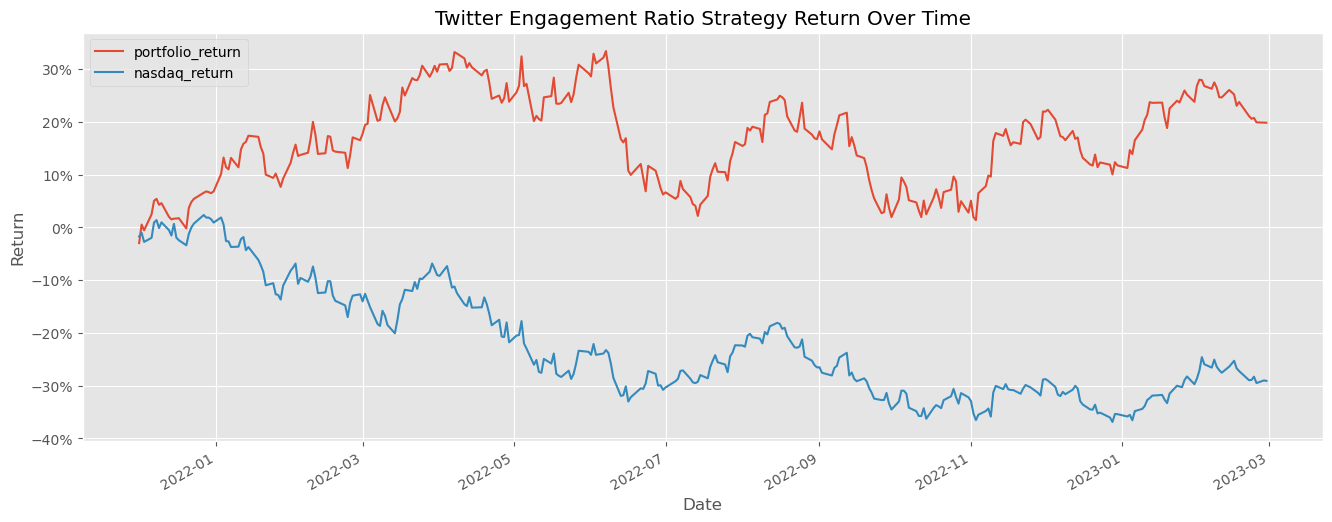

In [33]:
import matplotlib.ticker as mtick

# Calculate the cumulative return for the portfolio by:
# - Taking the log of the portfolio returns using np.log1p (which is equivalent to log(1 + return))
# - Calculating the cumulative sum of these log returns with .cumsum()
# - Converting the cumulative log returns back to percentage returns using np.exp() and subtracting 1
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

# Plot the cumulative return of the portfolio over time
portfolios_cumulative_return.plot(figsize=(16,6))

# Set the title of the plot
plt.title('Twitter Engagement Ratio Strategy Return Over Time')

# Format the y-axis to display percentages (multiply by 100 and add a '%' sign)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Label the y-axis as 'Return'
plt.ylabel('Return')

plt.show()

In [35]:
#We can see from the graph that the portfolio outperformed the NASDAQ from January 2022 to March 2023, concluding that this strategy was very successful compared to the market during this timeframe.